# Ejemplo de pipelines en GridSearchCV

<!---
https://medium.com/analytics-vidhya/ml-pipelines-using-scikit-learn-and-gridsearchcv-fe605a7f9e05

https://www.kaggle.com/c/learn-ai-bbc
-->
   

In [1]:
# Se cargan las librerías que se van a utilizar
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

from sklearn import feature_extraction, linear_model, metrics, model_selection, preprocessing
from sklearn import svm

from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, OneHotEncoder



#from sklearn.ensemble import RandomForestClassifier
#from sklearn.externals import joblib
#from sklearn.tree import DecisionTreeClassifier

In [2]:
## 1) EXTRAER DATOS
# Los datos pueden encontrarse en diferentes formatos, en nuestro caso están en formato csv.

# Se carga la base de datos
df = pd.read_csv('train_BBC_news.csv') #Se encuentra en la misma carpeta que el jupyter notebook

df_TEST = pd.read_csv('test_BBC_news.csv') #Se encuentra en la misma carpeta que el jupyter notebook

In [3]:
## 2) ANÁLISIS EXPLORATORIO
# Se realiza una descripción analítica de los datos.
print(df.shape) #Se tienen 1490 renglones y 3 columnas
df.head()

(1490, 3)


,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [4]:
print(df_TEST.shape) #Se tienen 735 renglones y 2 columnas
df_TEST.head()

(735, 2)


,ArticleId,Text
0,1018,qpr keeper day heads for preston queens park r...
1,1319,software watching while you work software that...
2,1138,d arcy injury adds to ireland woe gordon d arc...
3,459,india s reliance family feud heats up the ongo...
4,1020,boro suffer morrison injury blow middlesbrough...


Los datos de entrenamiento corresponden a la información de 1490 artículos de la BBC (The British Broadcasting Corporation).

La información que se tiene de cada noticia es (3 columnas):

   - **ArticleId:** Id del artículo
   - **Text:** Texto de la noticia
   - **Category:** Tipo de artículo (business, tech, sport, entertainment, politics)
   
Los datos de prueba corresponden a la información de 735 artículos de la BBC (2 columnas).

Se desea predecir el tipo de artículo de acuerdo al texto.

In [5]:
# Se cuenta el número de NaN's por columna
df.isnull().sum()

ArticleId    0
Text         0
Category     0
dtype: int64

In [6]:
# Se cuenta el número de NaN's por columna
df_TEST.isnull().sum()

ArticleId    0
Text         0
dtype: int64

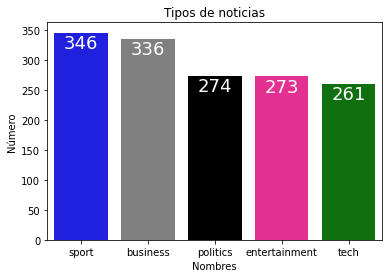

In [7]:
## 3) VISUALIZACIÓN DE LOS DATOS
# Para entender mejor los datos es necesario graficarlos.
vec_colores = ['blue','gray','black','deeppink','green']

#Gráfica por tipo de fruta
ax = sns.countplot(x="Category", data=df,order = df['Category'].value_counts().index,palette = vec_colores)
plt.title('Tipos de noticias')
plt.xlabel('Nombres')
plt.ylabel('Número')
for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()),
                    ha='center', va='center', color='white', size=18)
plt.show()

In [8]:
## 4) DIVIDIR LOS DATOS
X = df.Text
Y = df.Category
X_REAL_test = df_TEST.Text

# Se separan los datos en 4 conjuntos:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.2,random_state = 2020)


X.head()

0    worldcom ex-boss launches defence lawyers defe...
1    german business confidence slides german busin...
2    bbc poll indicates economic gloom citizens in ...
3    lifestyle  governs mobile choice  faster  bett...
4    enron bosses in $168m payout eighteen former e...
Name: Text, dtype: object

In [9]:
## 5) CONSTRUIR UN MODELO
# En este ejemplo vamos a elegir un modelo de regresión logística para "X_train"
logmodel = LogisticRegression()
complete_pipe_logReg = Pipeline([('vect', CountVectorizer()),
                                 ('tfidf', TfidfTransformer()),
                                 ('model', logmodel)])

**Descripción de las funciones utilizadas en el pipeline:**

[CountVectorizer():](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html) Convert a collection of text documents to a matrix of token counts.

[TfidfTransformer():](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html) Transform a count matrix to a normalized tf or tf-idf representation.


In [10]:
mod_logReg = complete_pipe_logReg.fit(X_train, Y_train)

In [11]:
## 6) PREDICCIONES
# Se hacen las predicciones con "X_test"
Y_pred = mod_logReg.predict(X_test)

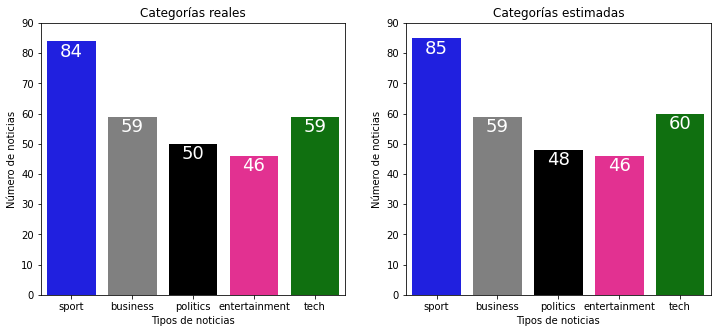

In [12]:
# Se grafican los resultados de la predicción junto con los valores reales
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)    
ax = sns.countplot(x=Y_test, data=df,order = df['Category'].value_counts().index,palette = vec_colores)
plt.title('Categorías reales')
plt.xlabel('Tipos de noticias')
plt.ylabel('Número de noticias')
plt.ylim(0,90)
for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()),
                    ha='center', va='center', color='white', size=18)

plt.subplot(1,2,2)    
ax2 = sns.countplot(x=Y_pred, data=df,order = df['Category'].value_counts().index,palette = vec_colores)
plt.title('Categorías estimadas')
plt.xlabel('Tipos de noticias')
plt.ylabel('Número de noticias')
plt.ylim(0,90)
for p in ax2.patches:
        ax2.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()),
                    ha='center', va='center', color='white', size=18)

In [13]:
## 7) EVALUACIÓN DEL MODELO
# Tasa de respuestas correctas del modelo en el conjunto de prueba
print('accuracy: {}%'.format(round(accuracy_score(Y_test, Y_pred)*100,2)))

accuracy: 98.32%


(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0, 0.5, 'business'),
  Text(0, 1.5, 'entertainment'),
  Text(0, 2.5, 'politics'),
  Text(0, 3.5, 'sport'),
  Text(0, 4.5, 'tech')])

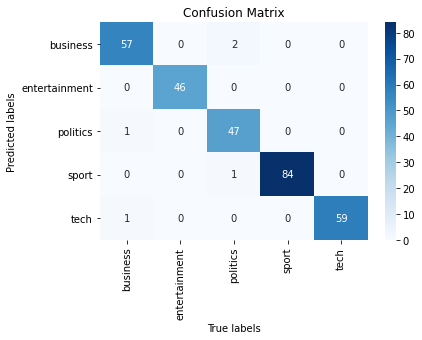

In [14]:
cm = confusion_matrix(Y_test, Y_pred).transpose()
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap="Blues");  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('True labels');ax.set_ylabel('Predicted labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['business', 'entertainment','politics','sport','tech']); 
ax.yaxis.set_ticklabels(['business', 'entertainment','politics','sport','tech']);
plt.xticks(rotation=90)
plt.yticks(rotation=0)
#ax.yaxis.set_ticklabels(['tech','sport','politics','entertainment', 'business']);

In [15]:
# Precisión: TP/suma_x_renglones
# Recall: : TP/suma_x_columnas
print('\n',classification_report(Y_test, Y_pred))


                precision    recall  f1-score   support

     business       0.97      0.97      0.97        59
entertainment       1.00      1.00      1.00        46
     politics       0.98      0.94      0.96        50
        sport       0.99      1.00      0.99        84
         tech       0.98      1.00      0.99        59

     accuracy                           0.98       298
    macro avg       0.98      0.98      0.98       298
 weighted avg       0.98      0.98      0.98       298



# Conclusiones

# Pipelines en Gridsearch 

In [16]:
## 5) CONSTRUIR UN MODELO
# En este ejemplo vamos a elegir un modelo de regresión logística para "X_train"
complete_pipe_logReg = Pipeline([('vect', CountVectorizer()),
                                 ('tfidf', TfidfTransformer()),
                                 ('clf', LogisticRegression())])

complete_pipe_SVM = Pipeline([('vect', CountVectorizer()),
                              ('tfidf', TfidfTransformer()),
                              ('clf', svm.SVC())])

In [17]:
# Se definen los parámetros de "GridSearch" para cada modelo
param_range = [9, 10]
param_range_fl = [1.0, 0.5]

grid_params_logReg = [{'clf__penalty': ['l1', 'l2'],'clf__C': param_range_fl,'clf__solver': ['liblinear']}] 
grid_params_svm = [{'clf__kernel': ['linear', 'rbf'],'clf__C': param_range}]


In [18]:
# Diccionario con los nombres de los modelos
grid_dict = {0: 'Logistic Regression', 1: 'Support Vector Machine'}

In [19]:
# Grid Searches
logReg = GridSearchCV(estimator=complete_pipe_logReg,
            param_grid=grid_params_logReg,
            scoring='accuracy',
            cv=5) #folds

jobs = -1
SVM = GridSearchCV(estimator=complete_pipe_SVM,
            param_grid=grid_params_svm,
            scoring='accuracy',
            cv=5,#folds
            n_jobs=jobs)

In [20]:
# Lista con los modelos
grids = [logReg,SVM]

In [21]:
# Fit the grid search objects
print('Realizando la optimización de los modelos...')
best_acc = 0.0
best_clf = 0
best_gs = ''
for idx, gs in enumerate(grids):
    print('\nEstimador: %s' % grid_dict[idx])
    gs.fit(X_train, Y_train)
    print('Los mejores parámetros son: %s' % gs.best_params_)
    print('Mejor "accuracy" de entrenamiento: %.3f' % gs.best_score_)
    # Se predice con los datos de prueba y los mejores parámetros
    Y_pred = gs.predict(X_test)
    print('"accuracy" para el conjunto de prueba con los mejores parámetros: %.3f ' % accuracy_score(Y_test, Y_pred))
    # Track best (highest test accuracy) model
    if accuracy_score(Y_test, Y_pred) > best_acc:
        best_acc = accuracy_score(Y_test, Y_pred)
        best_gs = gs
        best_clf = idx
print('\n El modelo con mejor "accuracy" en el conjunto de prueba es: %s' % grid_dict[best_clf])

Realizando la optimización de los modelos...

Estimador: Logistic Regression
Los mejores parámetros son: {'clf__C': 1.0, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Mejor "accuracy" de entrenamiento: 0.952
"accuracy" para el conjunto de prueba con los mejores parámetros: 0.983 

Estimador: Support Vector Machine
Los mejores parámetros son: {'clf__C': 9, 'clf__kernel': 'linear'}
Mejor "accuracy" de entrenamiento: 0.968
"accuracy" para el conjunto de prueba con los mejores parámetros: 0.987 

 El modelo con mejor "accuracy" en el conjunto de prueba es: Support Vector Machine


### Cross Validation con 10 folds

In [22]:
# Grid Searches
jobs = -1

logReg = GridSearchCV(estimator=complete_pipe_logReg,
            param_grid=grid_params_logReg,
            scoring='accuracy',
            cv=10) 

SVM = GridSearchCV(estimator=complete_pipe_SVM,
            param_grid=grid_params_svm,
            scoring='accuracy',
            cv=10,
            n_jobs=jobs)

# Lista con los modelos
grids = [logReg,SVM]

# Fit the grid search objects
print('Realizando la optimización de los modelos...')
best_acc = 0.0
best_clf = 0
best_gs = ''
for idx, gs in enumerate(grids):
    print('\nEstimador: %s' % grid_dict[idx])
    gs.fit(X_train, Y_train)
    print('Los mejores parámetros son: %s' % gs.best_params_)
    print('Mejor "accuracy" de entrenamiento: %.3f' % gs.best_score_)
    # Se predice con los datos de prueba y los mejores parámetros
    Y_pred = gs.predict(X_test)
    print('"accuracy" para el conjunto de prueba con los mejores parámetros: %.3f ' % accuracy_score(Y_test, Y_pred))
    # Track best (highest test accuracy) model
    if accuracy_score(Y_test, Y_pred) > best_acc:
        best_acc = accuracy_score(Y_test, Y_pred)
        best_gs = gs
        best_clf = idx
print('\n El modelo con mejor "accuracy" en el conjunto de prueba es: %s' % grid_dict[best_clf])

Realizando la optimización de los modelos...

Estimador: Logistic Regression
Los mejores parámetros son: {'clf__C': 1.0, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Mejor "accuracy" de entrenamiento: 0.953
"accuracy" para el conjunto de prueba con los mejores parámetros: 0.983 

Estimador: Support Vector Machine
Los mejores parámetros son: {'clf__C': 9, 'clf__kernel': 'linear'}
Mejor "accuracy" de entrenamiento: 0.970
"accuracy" para el conjunto de prueba con los mejores parámetros: 0.987 

 El modelo con mejor "accuracy" en el conjunto de prueba es: Support Vector Machine


## 6) PREDICCIONES REALES

In [23]:
#Se define una nueva pipeline, con los parámetros encontrados
pipe_SVM = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', svm.SVC(C = 9, kernel='linear'))])

mod_SVM = pipe_SVM.fit(X_train, Y_train)

In [24]:
# Se hacen las predicciones con "X_REAL_test"
Y_REAL_pred = mod_SVM.predict(X_REAL_test)

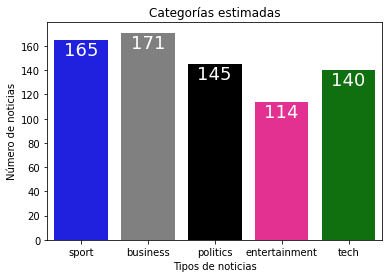

In [26]:
ax = sns.countplot(x=Y_REAL_pred, data=df_TEST,order = df['Category'].value_counts().index,palette = vec_colores)
plt.title('Categorías estimadas')
plt.xlabel('Tipos de noticias')
plt.ylabel('Número de noticias')
#plt.ylim(0,90)
for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()),
                    ha='center', va='center', color='white', size=18)

In [27]:
## 7) EVALUACIÓN DEL MODELO
print('Score = ',round(pipe_SVM.score(X_train, Y_train) * 100, 2),
      '% = Tasa de respuestas correctas del modelo en el conjunto de entrenamiento')

Score =  100.0 % = Tasa de respuestas correctas del modelo en el conjunto de entrenamiento


# Generación de archivo para [Kaggle](https://www.kaggle.com/c/learn-ai-bbc/submit)

In [28]:
submit=pd.DataFrame([df_TEST["ArticleId"].astype("int64"),Y_REAL_pred])
submit.T.to_csv('sample_submission.csv',index=False)
submit.T

,ArticleId,Unnamed 0
0,1018,sport
1,1319,tech
2,1138,sport
3,459,business
4,1020,sport
...,...,...
730,1923,business
731,373,entertainment
732,1704,politics
733,206,business


# Conclusiones